In [100]:
# 1. Завантажити набір даних.
!wget -O SpamEmailClassificationDataset.zip https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/SpamEmailClassificationDataset.zip?raw=true

--2024-08-16 17:44:25--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/SpamEmailClassificationDataset.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/main/SpamEmailClassificationDataset.zip [following]
--2024-08-16 17:44:25--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/main/SpamEmailClassificationDataset.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/main/SpamEmailClassificationDataset.zip [following]
--2024-08-16 17:44:26--  https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/main/SpamEmailClassificationDataset.zip
Resolving raw.githubusercontent.com (raw.github

In [101]:
# 2. Розпакувати файл даних
!unzip SpamEmailClassificationDataset.zip
    # Після цього файл буде знаходитись у локальній пам'яті Colab за посиланням './combined_data.csv'.

Archive:  SpamEmailClassificationDataset.zip
replace SpamEmailClassificationDataset/combined_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: SpamEmailClassificationDataset/combined_data.csv  


In [102]:
# 3.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk


In [103]:
# 4. Прочитати дані

df = pd.read_csv('./SpamEmailClassificationDataset/combined_data.csv', header=1)
# df = df.drop(0)  # Видаляє перший рядок
df.head()

# В оригінальному наборі даних міститься 83448 записів. Отже, для подальшої роботи має сенс відібрати тільки декілька тисяч записів.

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [104]:
print(df.shape)
df = df.iloc[:-12860] # Залишаю 2000 записей для швидшого обчислення
print(df.shape)

(14860, 2)
(2000, 2)


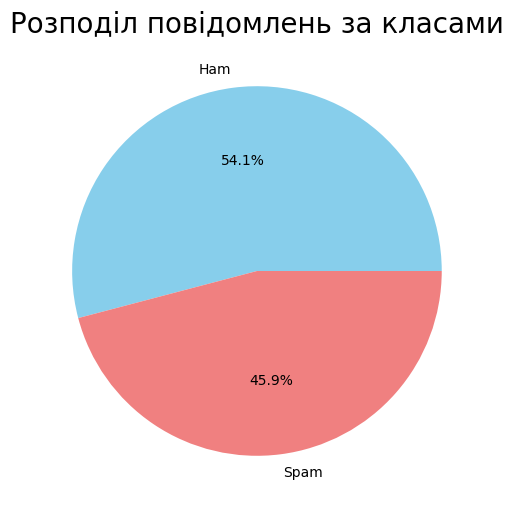

In [105]:
# 5. Візуалізувати розподіл повідомлень за двома класами у вигляді гістограми або Pie Chart. Краще, якщо вибірка даних буде містити майже рівну кількість повідомлень обох класів.

# Підрахунок кількості записів для кожного класу
class_counts = df['label'].value_counts()

# Pie Chart
plt.figure(figsize=(6,6))
class_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], labels=['Ham', 'Spam'])
plt.title('Розподіл повідомлень за класами', fontsize=20)
plt.ylabel('')  # Приховати назву осі y
plt.show()


In [106]:
# 6. Застосувати методи обробки тексту бібліотеки nltk для перетворення текстів: приведення до нижнього регістру, приведення слів до словникової форми, видалення повторів слів у повідомленні.
from nltk.stem import WordNetLemmatizer  # лематизатор приводить слова до їхньої базової форми ("running" → "run").

corpus = []

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

nltk.download('punkt')  # ?

for document in df["text"]:
    document = re.sub("[^a-zA-Z]", " ", document).lower()
    document = document.split()
    document = [lemmatizer.lemmatize(word) for word in document if word not in stop_words]
    # print(document)
    document = list(set(document))
    document = " ".join(document)
    corpus.append(document)

df["text"] = corpus
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,label,text
0,1,heft opec moment afterimage flack desperate qu...
1,1,dmvrwm stopped valium life reducing branded me...
2,0,preference put toy stepping dell achievement u...
3,1,career come class degree based knowledge alway...
4,0,get default arm ninux debian excluded destinat...


In [107]:
# 7. Підготувати структури даних train_spam, train_ham, test_emails, які будуть містити повідомлення spam для тренування, повідомлення ham для тренування та словник тестових повідомлень. Приклад цих структур даних наведено в конспекті.

import pandas as pd
from sklearn.model_selection import train_test_split

# Розділення даних на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

# Створення тренувальних і тестових структур даних
train_spam = X_train[y_train == 1].tolist()
# print('  train_spam', train_spam)
train_ham = X_train[y_train == 0].tolist()
# print('  train_ham', train_ham)
# test_emails = X_test.tolist()

test_emails = {
    'spam': X_test[y_test == 1].tolist(),
    'ham': X_test[y_test == 0].tolist()
}
# print('  test_emails', test_emails)


# Перевірка результатів
print(f"Number of train spam messages: {len(train_spam)}")
print(f"Number of train ham messages: {len(train_ham)}")
print(f"  Number of spams in test_emails: {len(test_emails['spam'])}")
print(f"  Number of hams in test_emails:: {len(test_emails['ham'])}")


Number of train spam messages: 857
Number of train ham messages: 743
  Number of spams in test_emails: 225
  Number of hams in test_emails:: 175


In [108]:
# 8. Застосувати наведену в конспекті реалізацію алгоритму наївного Баєса.


# make a vocabulary of unique words that occur in known spam emails
vocab_words_spam = []

for sentence in train_spam:
    sentence_as_list = sentence.split()
    for word in sentence_as_list:
        vocab_words_spam.append(word)

print(len(vocab_words_spam), 'слів к спамі')
print(vocab_words_spam)

#  Перетворюємо кожен елемент списку у множину для виділення унікальних слів — та назад у список.
vocab_unique_words_spam = list(set(vocab_words_spam))
print(len(vocab_unique_words_spam), 'унікальних слів')
print(vocab_unique_words_spam)


71715 слів к спамі
['cpr', 'life', 'adding', 'put', 'said', 'special', 'take', 'bit', 'situation', 'get', 'exchange', 'netherlands', 'protected', 'pas', 'catch', 'esther', 'site', 'ocean', 'ta', 'wwf', 'kind', 'quickly', 'picked', 'training', 'continues', 'u', 'man', 'bike', 'closer', 'news', 'cooking', 'back', 'tuesday', 'rescue', 'usa', 'trained', 'equipment', 'skill', 'carry', 'went', 'yes', 'may', 'anyone', 'world', 'mind', 'two', 'regulator', 'visible', 'break', 'challenge', 'investor', 'without', 'week', 'mother', 'attacked', 'started', 'physically', 'heavy', 'judge', 'swimming', 'looked', 'everything', 'another', 'unworkable', 'based', 'stock', 'one', 'bikers', 'craft', 'different', 'full', 'escapenumber', 'despite', 'canoe', 'drag', 'able', 'sure', 'home', 'various', 'climb', 'businessnewsnow', 'head', 'never', 'also', 'way', 'york', 'saving', 'couple', 'organization', 'laughter', 'every', 'device', 'group', 'necessary', 'exhaust', 'find', 'composed', 'part', 'inner', 'waiting'

In [109]:
# Визначаємо ймовірність приналежності кожного слова до спаму та застосовуємо згладжування.
dict_spamicity = {}
for w in vocab_unique_words_spam:
    emails_with_w = 0     # counter
    for sentence in train_spam:
        if w in sentence:
            emails_with_w+=1

    # print(f"Number of spam emails with the word '{w}': {emails_with_w}")
    total_spam = len(train_spam)
    spamicity = (emails_with_w+1)/(total_spam+2)
    # print(f"Spamicity of the word '{w}': {spamicity} \n")
    dict_spamicity[w.lower()] = spamicity

print('Ймовірність приналежності кожного слова до спаму')
print(dict_spamicity)

Ймовірність приналежності кожного слова до спаму
{'maiden': 0.002328288707799767, 'lackluster': 0.002328288707799767, 'hdd': 0.002328288707799767, 'dromedary': 0.002328288707799767, 'ttyescapenumber': 0.002328288707799767, 'record': 0.024447031431897557, 'pay': 0.11641443538998836, 'hkour': 0.002328288707799767, 'deprecatory': 0.002328288707799767, 'bypath': 0.002328288707799767, 'trash': 0.002328288707799767, 'dentistry': 0.0034924330616996507, 'rmclsod': 0.002328288707799767, 'tri': 0.23050058207217694, 'canadaamong': 0.002328288707799767, 'casino': 0.009313154831199068, 'kst': 0.012805587892898719, 'triunfar': 0.002328288707799767, 'succursales': 0.002328288707799767, 'patch': 0.023282887077997673, 'unworkable': 0.002328288707799767, 'pharm': 0.09662398137369034, 'javaee': 0.002328288707799767, 'hitwise': 0.002328288707799767, 'roll': 0.02910360884749709, 'titlestyletd': 0.002328288707799767, 'preapproved': 0.0034924330616996507, 'delle': 0.002328288707799767, 'federa': 0.0244470314

In [110]:
# Визначаємо ймовірність приналежності кожного слова до важливих повідомлень.

# make a vocabulary of unique words that occur in known ham emails
vocab_words_ham = []
for sentence in train_ham:
    sentence_as_list = sentence.split()
    for word in sentence_as_list:
        vocab_words_ham.append(word)

vocab_unique_words_ham = list(set(vocab_words_ham))
print('Список унікальних слів в ham')
print(vocab_unique_words_ham)

dict_hamicity = {}
for w in vocab_unique_words_ham:
    emails_with_w = 0     # counter
    for sentence in train_ham:
        if w in sentence:
            # print(w+":", sentence)
            emails_with_w+=1

    # print(f"Number of ham emails with the word '{w}': {emails_with_w}")
    total_ham = len(train_ham)
    Hamicity = (emails_with_w+1)/(total_ham+2)       # Smoothing applied
    # print(f"Hamicity of the word '{w}': {Hamicity} ")
    dict_hamicity[w.lower()] = Hamicity

print('Ймовірність приналежності кожного слова до ham')
print(dict_hamicity)



Список унікальних слів в ham
['compared', 'extremely', 'msmiami', 'yesno', 'archname', 'hubble', 'kremer', 'hdd', 'cran', 'preparedness', 'xfe', 'bergstrom', 'dig', 'reminder', 'record', 'improve', 'scholes', 'decommisioning', 'slapnicar', 'plotted', 'pay', 'berkeley', 'energ', 'hatma', 'anytime', 'addr', 'apprentissage', 'emaillink', 'preserved', 'cooking', 'nging', 'trash', 'infringement', 'originally', 'mem', 'xfescapenumber', 'roadmap', 'bane', 'errbadpath', 'coleda', 'grappling', 'parens', 'visibility', 'rgl', 'terrorist', 'string', 'tri', 'escapenumberfc', 'mf', 'dilip', 'apollo', 'mieszkanie', 'oversaw', 'casino', 'condition', 'cond', 'dc', 'raz', 'kaminski', 'htmldoc', 'patch', 'pacesetter', 'editorial', 'hopefully', 'situationroom', 'fd', 'surfing', 'crossing', 'esm', 'wpacked', 'freezing', 'leavin', 'rumour', 'eyeglass', 'english', 'relational', 'awar', 'automake', 'monk', 'cosperu', 'groenewold', 'invaluable', 'converting', 'bowes', 'crocker', 'far', 'sptimes', 'evaluated', 

In [111]:
# Обчислюємо ймовірність спаму  P(S) .
prob_spam = len(train_spam) / (len(train_spam)+(len(train_ham)))
print(prob_spam)

# Обчислюємо ймовірність важливого повідомлення  P(H) .
prob_ham = len(train_ham) / (len(train_spam)+(len(train_ham)))
print(prob_ham)

prob_ham  + prob_spam




0.535625
0.464375


1.0

In [112]:
# # tests = []
# # for i in test_emails['spam']:
# #     tests.append(i)

# # for i in test_emails['ham']:
# #     tests.append(i)

# tests = test_emails['spam'] + test_emails['ham']
# print('  E-mails для тестування')
# print(tests)

# # split emails into distinct words

# # distinct_words_as_sentences_test = []
# # for sentence in tests:
# #     sentence_as_list = sentence.split()
# #     senten = []
# #     for word in sentence_as_list:
# #         senten.append(word)
# #     distinct_words_as_sentences_test.append(senten)

# distinct_words_as_sentences_test = [sentence.split() for sentence in tests]
# print('  Слова для тестування')
# print(distinct_words_as_sentences_test)

# # test_spam_tokenized = [distinct_words_as_sentences_test[0], distinct_words_as_sentences_test[1]]
# # test_ham_tokenized = [distinct_words_as_sentences_test[2], distinct_words_as_sentences_test[3]]

# test_spam_tokenized = distinct_words_as_sentences_test[:len(test_emails['spam'])]
# test_ham_tokenized = distinct_words_as_sentences_test[len(test_emails['spam']):]

# Токенізація спам повідомлень
test_spam_tokenized = [sentence.split() for sentence in test_emails['spam']]

# Токенізація хам повідомлень
test_ham_tokenized = [sentence.split() for sentence in test_emails['ham']]

print('  Spam-слова для тестування (список списків)')
print(test_spam_tokenized)

print('  Ham-слова для тестування (список списків)')
print(test_ham_tokenized)

  Spam-слова для тестування (список списків)
[['philadelphia', 'new', 'said', 'advice', 'incredible', 'like', 'one', 'using', 'important', 'natural', 'site', 'escapenumber', 'need', 'child', 'dr', 'author', 'video', 'variety', 'change', 'reinforce', 'would', 'common', 'huge', 'many', 'customer', 'evennoted', 'company', 'effective', 'ual', 'kenneth', 'allowing', 'may', 'find', 'due', 'partner', 'e', 'assist', 'force', 'desire', 'wondercum', 'experience', 'euphoria', 'show', 'instead', 'believe', 'spontaneous', 'ejaculation', 'increasing', 'response', 'older', 'annual', 'time', 'meeting', 'academy', 'visit', 'pennsylvania', 'preparation', 'pediatrician', 'obesity', 'stress', 'really', 'web', 'constant', 'orgasm'], ['men', 'smart', 'new', 'whether', 'moment', 'get', 'different', 'natural', 'site', 'w', 'front', 'child', 'se', 'buddy', 'cal', 'good', 'ingredient', 'monday', 'trouble', 'play', 'development', 'check', 'xtrasize', 'creation', 'many', 'orld', 'fr', 'load', 'join', 'rebate', 'a

In [113]:
# Видаляємо слова, що не зустрічались у навчальному наборі даних.

reduced_sentences_spam_test = []
for sentence in test_spam_tokenized:
    words_ = []
    for word in sentence:
        if word in vocab_unique_words_spam:
            # print(f"'{word}', ok")
            words_.append(word)
        elif word in vocab_unique_words_ham:
            # print(f"'{word}', ok")
            words_.append(word)
        else:
            # print(f"'{word}', word not present in labelled spam training data")
            pass
    reduced_sentences_spam_test.append(words_)
print('  Знайдені Spam-слова відомі натренованим словникам')
print(reduced_sentences_spam_test)

reduced_sentences_ham_test = []                   # repeat for ham words
for sentence in test_ham_tokenized:
    words_ = []
    for word in sentence:
        if word in vocab_unique_words_ham:
            # print(f"'{word}', ok")
            words_.append(word)
        elif word in vocab_unique_words_spam:
            # print(f"'{word}', ok")
            words_.append(word)
        else:
            # print(f"'{word}', word not present in labelled ham training data")
            pass
    reduced_sentences_ham_test.append(words_)

print('  Знайдені Ham-слова відомі натренованим словникам')
print(reduced_sentences_ham_test)

  Знайдені Spam-слова відомі натренованим словникам
[['philadelphia', 'new', 'said', 'advice', 'incredible', 'like', 'one', 'using', 'important', 'natural', 'site', 'escapenumber', 'need', 'child', 'dr', 'author', 'video', 'variety', 'change', 'would', 'common', 'huge', 'many', 'customer', 'company', 'effective', 'ual', 'kenneth', 'allowing', 'may', 'find', 'due', 'partner', 'e', 'assist', 'force', 'desire', 'wondercum', 'experience', 'euphoria', 'show', 'instead', 'believe', 'spontaneous', 'ejaculation', 'increasing', 'response', 'older', 'annual', 'time', 'meeting', 'academy', 'visit', 'pennsylvania', 'preparation', 'pediatrician', 'obesity', 'stress', 'really', 'web', 'constant', 'orgasm'], ['men', 'smart', 'new', 'whether', 'moment', 'get', 'different', 'natural', 'site', 'w', 'front', 'child', 'se', 'buddy', 'cal', 'good', 'ingredient', 'monday', 'trouble', 'play', 'development', 'check', 'xtrasize', 'creation', 'many', 'fr', 'load', 'join', 'rebate', 'allowing', 'plant', 'world',

In [114]:
# Вилучення неключових слів. Це може допомогти класифікатору зосередитись на важливих словах.

test_spam_stemmed = []
non_key = ['us',  'the', 'of','your']       # non-key words, gathered from spam,ham and test sentences
for email in reduced_sentences_spam_test:
    email_stemmed=[]
    for word in email:
        if word in non_key:
            print('remove')
        else:
            email_stemmed.append(word)
    test_spam_stemmed.append(email_stemmed)

print('  Spam-слова для для перевірки')
print(test_spam_stemmed)

test_ham_stemmed = []
non_key = ['us',  'the', 'of', 'your']
for email in reduced_sentences_ham_test:
    email_stemmed=[]
    for word in email:
        if word in non_key:
            print('remove')
        else:
            email_stemmed.append(word)
    test_ham_stemmed.append(email_stemmed)
print('  Ham-слова для для перевірки')
print(test_ham_stemmed)

remove
  Spam-слова для для перевірки
[['philadelphia', 'new', 'said', 'advice', 'incredible', 'like', 'one', 'using', 'important', 'natural', 'site', 'escapenumber', 'need', 'child', 'dr', 'author', 'video', 'variety', 'change', 'would', 'common', 'huge', 'many', 'customer', 'company', 'effective', 'ual', 'kenneth', 'allowing', 'may', 'find', 'due', 'partner', 'e', 'assist', 'force', 'desire', 'wondercum', 'experience', 'euphoria', 'show', 'instead', 'believe', 'spontaneous', 'ejaculation', 'increasing', 'response', 'older', 'annual', 'time', 'meeting', 'academy', 'visit', 'pennsylvania', 'preparation', 'pediatrician', 'obesity', 'stress', 'really', 'web', 'constant', 'orgasm'], ['men', 'smart', 'new', 'whether', 'moment', 'get', 'different', 'natural', 'site', 'w', 'front', 'child', 'se', 'buddy', 'cal', 'good', 'ingredient', 'monday', 'trouble', 'play', 'development', 'check', 'xtrasize', 'creation', 'many', 'fr', 'load', 'join', 'rebate', 'allowing', 'plant', 'world', 'warning', 'g

In [115]:
print(len(reduced_sentences_spam_test))
print(len(reduced_sentences_ham_test))
print(len(test_spam_stemmed))
print(len(test_ham_stemmed))

225
175
225
175


In [116]:
# приклад реалізації наївного класифікатора Баєса.
def mult(list_) :        # function to multiply all word probs together
    total_prob = 1
    for i in list_:
         total_prob = total_prob * i
    return total_prob

def Bayes(email):
    probs_s = []
    probs_h = []

    for word in email:
        Pr_S = prob_spam
        # print('prob of spam in general ',Pr_S)
        try:
            pr_WS = dict_spamicity[word]
            # print(f'prob "{word}"  is a spam word : {pr_WS}')
        except KeyError:
            pr_WS = 1/(total_spam+2)  # Apply smoothing for word not seen in spam training data, but seen in ham training
            # print(f"prob '{word}' is a spam word: {pr_WS}")

        Pr_H = prob_ham
        # print('prob of ham in general ', Pr_H)
        try:
            pr_WH = dict_hamicity[word]
            # print(f'prob "{word}" is a ham word: ',pr_WH)
        except KeyError:
            pr_WH = (1/(total_ham+2))  # Apply smoothing for word not seen in ham training data, but seen in spam training
            # print(f"WH for {word} is {pr_WH}")
            # print(f"prob '{word}' is a ham word: {pr_WH}")

        prob_word_is_spam_BAYES = pr_WS
        prob_word_is_ham_BAYES = pr_WH


        # print('')
        # print(f"Using Bayes, prob the the word '{word}' is spam: {prob_word_is_spam_BAYES}")
        # print('###########################')
        probs_s.append(prob_word_is_spam_BAYES)
        probs_h.append(prob_word_is_ham_BAYES)
    # print(f"All word probabilities for this sentence: {probs_s}, {probs_h}")



    denominator = (Pr_S * mult(probs_s)) + (Pr_H * mult(probs_h))
    if denominator == 0:
        # print(f"{Pr_S * mult(probs_s)} + {Pr_H * mult(probs_h)} = {denominator}")
        # print(probs_s)
        # print(probs_h)
        # print(Pr_S)
        # print(Pr_H)
        # print(mult(probs_s))
        # print(mult(probs_h))
        # print(f"denominator2 = {(Pr_S*0.00000000001)+(Pr_H*0.000000001)}")
        print("Помилка: знаменник дорівнює нулю.")
        return None
    else:


        final_classification = Pr_S*mult(probs_s) /((Pr_S*mult(probs_s))+(Pr_H*mult(probs_h)))
        # print('###########################')
    if final_classification >= 0.5:
        print(f'email is SPAM: with spammy confidence of {final_classification*100}%')
    else:
        print(f'email is HAM: with spammy confidence of {final_classification*100}%')
    return final_classification


    Testing stemmed SPAM email ['philadelphia', 'new', 'said', 'advice', 'incredible', 'like', 'one', 'using', 'important', 'natural', 'site', 'escapenumber', 'need', 'child', 'dr', 'author', 'video', 'variety', 'change', 'would', 'common', 'huge', 'many', 'customer', 'company', 'effective', 'ual', 'kenneth', 'allowing', 'may', 'find', 'due', 'partner', 'e', 'assist', 'force', 'desire', 'wondercum', 'experience', 'euphoria', 'show', 'instead', 'believe', 'spontaneous', 'ejaculation', 'increasing', 'response', 'older', 'annual', 'time', 'meeting', 'academy', 'visit', 'pennsylvania', 'preparation', 'pediatrician', 'obesity', 'stress', 'really', 'web', 'constant', 'orgasm'] :
email is SPAM: with spammy confidence of 99.99996999122143%
0.9999996999122144

    Testing stemmed SPAM email ['men', 'smart', 'new', 'whether', 'moment', 'get', 'different', 'natural', 'site', 'w', 'front', 'child', 'se', 'buddy', 'cal', 'good', 'ingredient', 'monday', 'trouble', 'play', 'development', 'check', 'x

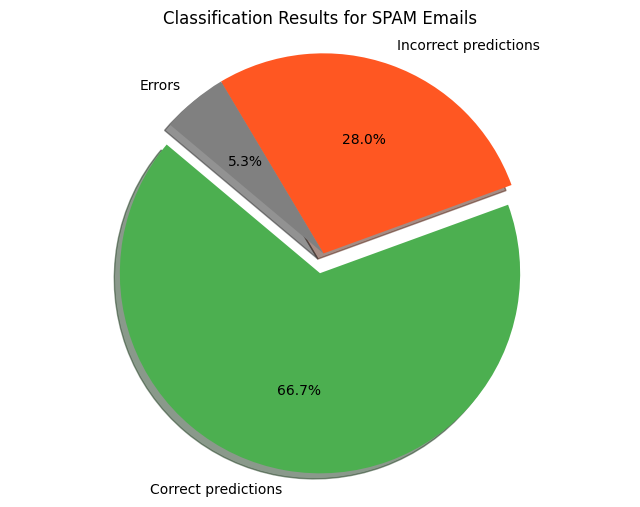

In [117]:
correct_predictions = 0
incorrect_predictions = 0
errors = 0
total_tests = len(test_spam_stemmed)  # Загальна кількість тестових email

for email in test_spam_stemmed:
    print('')
    print(f"    Testing stemmed SPAM email {email} :")
    all_word_probs = Bayes(email)
    print(all_word_probs)

    if all_word_probs == None:
        errors += 1
    elif all_word_probs >= 0.5:
        correct_predictions += 1
    else:
        incorrect_predictions += 1


print(f"\nTotal SPAM tests: {total_tests}")
print(f"Correct SPAM predictions: {correct_predictions}")
print(f"Incorrect predictions: {incorrect_predictions}")
print(f"Errors: {errors}")

# Дані для побудови діаграми
labels = ['Correct predictions', 'Incorrect predictions', 'Errors']
sizes = [correct_predictions, incorrect_predictions, errors]
colors = ['#4CAF50', '#FF5722', 'gray']
explode = (0.1, 0, 0)  # Виділити "Correct predictions"

# Побудова кругової діаграми
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Classification Results for SPAM Emails')
plt.axis('equal')  # Щоб діаграма виглядала як коло
plt.show()


           Testing stemmed HAM email ['dedicated', 'found', 'mean', 'best', 'hosted', 'jesse', 'lester', 'hosting', 'www', 'performance', 'year', 'html', 'escapenumber', 'tried', 'chicago', 'com', 'wiki', 'andy', 'line', 'petdance', 'home', 'much', 'fast', 'also', 'slow', 'http', 'news', 'check', 'workspace', 'foundation', 'server', 'parrot', 'box', 'perl', 'hackathon', 'moved', 'thank', 'two', 'better', 'dsl', 'infrastructure', 'jun', 'wrote', 'thanks', 'org', 'aim', 'perlescapenumber', 'toronto', 'rakudo', 'ongoing', 'wikis'] :
email is HAM: with spammy confidence of 8.155504691338838e-16%
8.155504691338838e-18

           Testing stemmed HAM email ['vince', 'dear', 'think', 'mr', 'come', 'ste', 'mscf', 'thursday', 'saying', 'subject', 'pierre', 'com', 'series', 'whoever', 'sincerely', 'enron', 'would', 'friday', 'marie', 'j', 'night', 'cc', 'better', 'could', 'prefer', 'without', 'go', 'philippe', 'invited', 'discus', 'presentation', 'dinner', 'kaminski', 'speaker'] :
email is HAM:

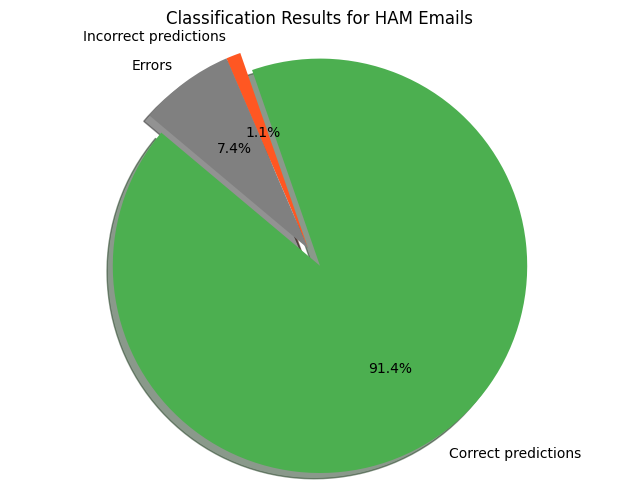

In [118]:
correct_predictions = 0
incorrect_predictions = 0
errors = 0
total_tests = len(test_ham_stemmed)  # Загальна кількість тестових email

for email in test_ham_stemmed:
    print('')
    print(f"           Testing stemmed HAM email {email} :")
    all_word_probs = Bayes(email)
    print(all_word_probs)

    if all_word_probs == None:
        errors += 1
    elif all_word_probs < 0.5:
        correct_predictions += 1
    else:
        incorrect_predictions += 1


print(f"\nTotal HAM tests: {total_tests}")
print(f"Correct predictions: {correct_predictions}")
print(f"Incorrect predictions: {incorrect_predictions}")
print(f"Errors: {errors}")

# Дані для побудови діаграми
labels = ['Correct predictions', 'Incorrect predictions', 'Errors']
sizes = [correct_predictions, incorrect_predictions, errors]
colors = ['#4CAF50', '#FF5722', 'gray']
explode = (0.1, 0, 0)  # Виділити "Correct predictions"

# Побудова кругової діаграми
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Classification Results for HAM Emails')
plt.axis('equal')  # Щоб діаграма виглядала як коло
plt.show()

## Оцінка результатів класифікації

Загальна кількість тестів для SPAM: 225
* Правильні передбачення SPAM: 149
* Неправильні передбачення SPAM: 64
* Помилки у класифікації SPAM: 12

Загальна кількість тестів для HAM: 175

* Правильні передбачення HAM: 160
* Неправильні передбачення HAM: 2
* Помилки у класифікації HAM: 13


# Висновки:
* Результати для SPAM: Модель правильно класифікує приблизно 66% SPAM електронних листів, що є хорошим результатом, але має місце значна кількість неправильних класифікацій (64 випадки). Це свідчить про те, що модель має певні труднощі з розпізнаванням SPAM серед тестових даних.

* Результати для HAM: Модель продемонструвала високий рівень точності у класифікації HAM електронних листів, досягнувши 91% правильних передбачень. Помилок у класифікації HAM порівняно небагато, що свідчить про стабільну роботу моделі в цьому випадку.

## Помилка:
* Модель має певні труднощі з класифікацією SPAM, ймовірно через числові проблеми, які виникають при роботі з малими ймовірностями при перемножуванні (наприклад: 0.001 * 0.002 * 0.00153 * 0.0021 і т.д. досягне дуже малого числа, наближеного до 0 яке програмою округлиться до 0, а при діленні на 0 виникне помилка). Класифікація None може бути наслідком проблем з такою точністю числових обчислень і призведе до нестабільності моделі при низьких ймовірностях.
* Помилка в обчисленнях, пов'язана з числовими проблемами, не є безпосередньо помилкою в контексті спаму чи хаму. Це технічна проблема, яку потрібно вирішити для забезпечення точності моделі. Виправлення таких помилок допоможе моделі краще виконувати свою функцію, незалежно від того, чи вона використовується для виявлення спаму, хамства чи інших категорій тексту

## Рекомендації для подальшого дослідження:
* Оптимізація числових обчислень: Використання логарифмічних функцій для обчислення ймовірностей може допомогти уникнути проблем з дуже малими значеннями ймовірностей та підвищити точність моделі.

* Оцінка і корекція параметрів моделі: Провести додаткову перевірку і налаштування параметрів моделі, таких як пороги класифікації та коефіцієнти ймовірностей, щоб поліпшити розпізнавання SPAM.

* Аналіз помилкових передбачень: Провести детальний аналіз неправильно класифікованих електронних листів, щоб зрозуміти, які ознаки викликають проблеми в класифікації, і внести відповідні корективи в модель.

* Додаткові тести і валідація: Виконати додаткові тести на нових наборах даних, включаючи більш різноманітні та великих за обсягом дані, для перевірки стабільності і загальної продуктивності моделі.




